In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/android-app-market-on-google-play/datasets/apps.csv
/kaggle/input/android-app-market-on-google-play/datasets/user_reviews.csv


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
apps_data = pd.read_csv('/kaggle/input/android-app-market-on-google-play/datasets/apps.csv')
user_reviews_data = pd.read_csv('/kaggle/input/android-app-market-on-google-play/datasets/user_reviews.csv')

In [4]:
print(apps_data.head())
print(user_reviews_data.head())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [5]:
print(apps_data.isnull().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [6]:
print(user_reviews_data.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


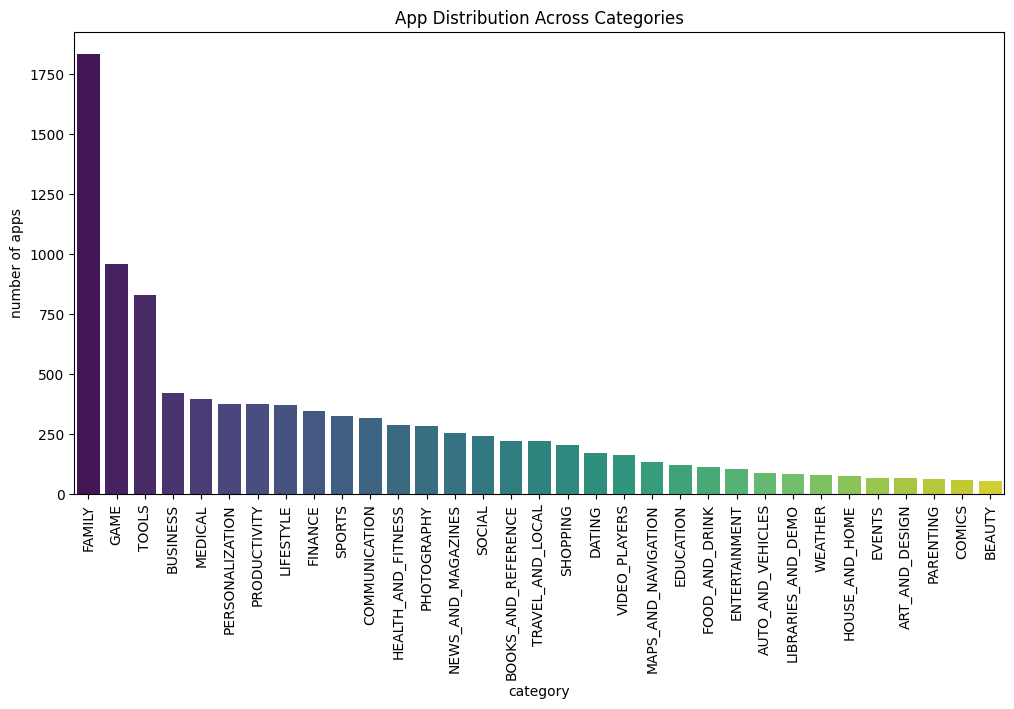

In [7]:
# category exploration
category_distribution = apps_data['Category'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=category_distribution.index, y=category_distribution.values,palette='viridis')
plt.xticks(rotation=90)
plt.title('App Distribution Across Categories')
plt.xlabel('category')
plt.ylabel('number of apps')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


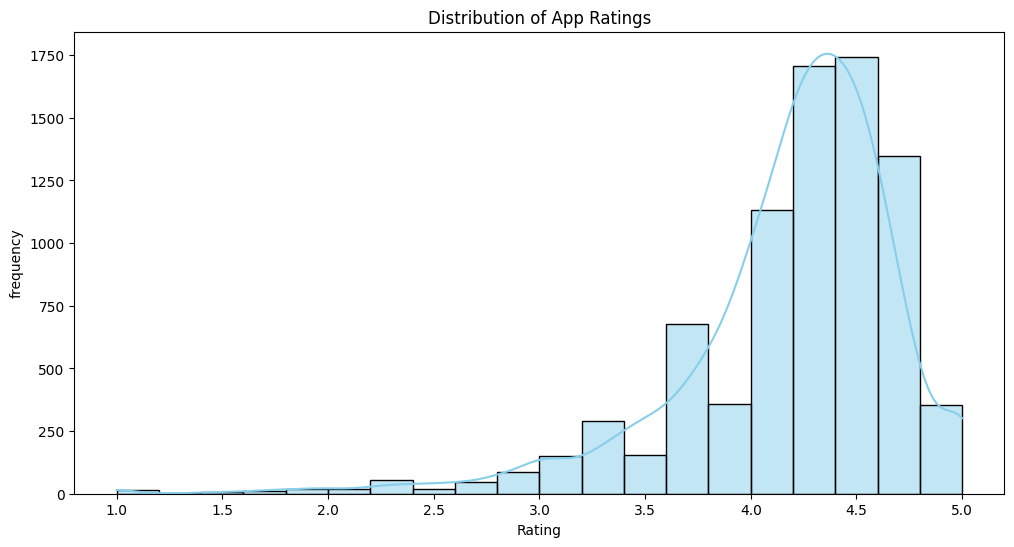

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


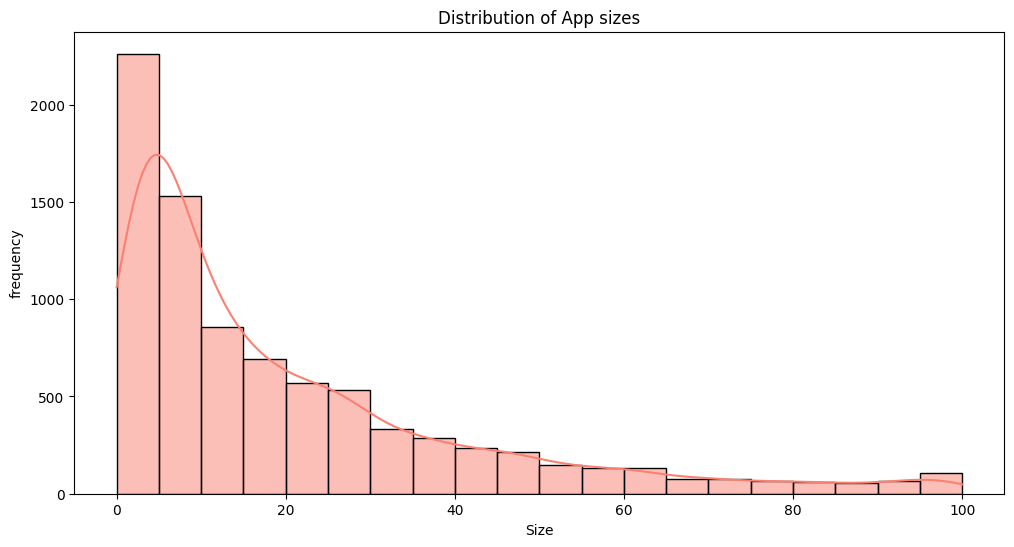

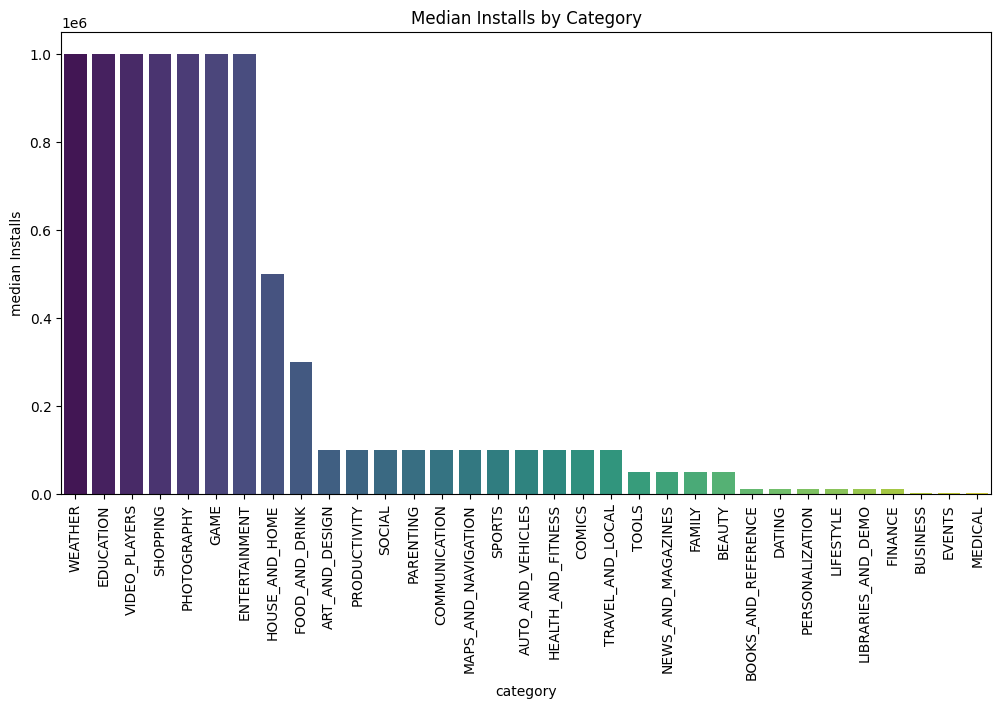

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


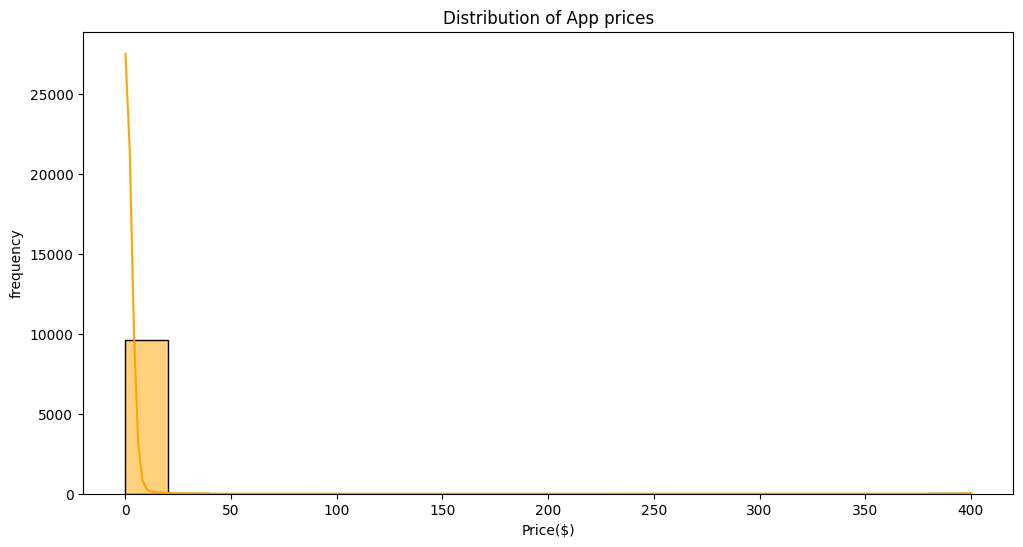

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(apps_data['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('frequency')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(apps_data['Size'], bins=20, kde=True, color='salmon')
plt.title('Distribution of App sizes')
plt.xlabel('Size')
plt.ylabel('frequency')
plt.show()

apps_data['Installs'] = apps_data['Installs'].str.replace('+','').str.replace(',','').astype(int)


popularity_distribution = apps_data.groupby('Category')['Installs'].median().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=popularity_distribution.index, y=popularity_distribution.values,palette="viridis")
plt.xticks(rotation=90)
plt.title('Median Installs by Category')
plt.xlabel('category')
plt.ylabel('median Installs')
plt.show()

apps_data['Price'] = apps_data['Price'].str.replace('$','').astype(float)
plt.figure(figsize=(12,6))
sns.histplot(apps_data['Price'], bins=20, kde=True, color='orange')
plt.title('Distribution of App prices')
plt.xlabel('Price($)')
plt.ylabel('frequency')
plt.show()

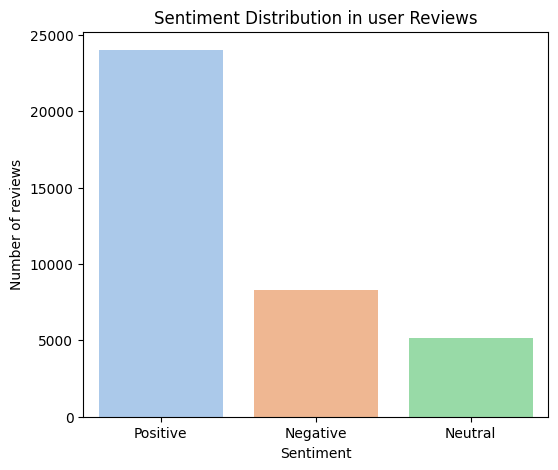

In [9]:
sentiment_distribution = user_reviews_data['Sentiment'].value_counts()
plt.figure(figsize=(6,5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values,palette="pastel")
plt.title('Sentiment Distribution in user Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of reviews')
plt.show()

In [10]:
popularity_distribution = apps_data['Installs'].value_counts()
popularity_distribution = popularity_distribution.reset_index()
popularity_distribution.columns = ['Installs','Count']

fig= px.bar(popularity_distribution,x='Installs', y='Count',title='App Popularity by Number of Installs')
fig.update_traces(marker_color='orange')
fig.show()